Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [2]:
airbnb<-read.csv('airbnb-listings.csv',sep = ';')
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

In [3]:
library(dplyr)
library(ggplot2)
library(dendextend)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'dendextend' was built under R version 3.6.3"
---------------------
Welcome to dendextend version 1.15.1
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------


Attaching package: 'dendextend'

T

In [4]:
columns <- c('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [5]:
airbnb <- select(airbnb, all_of(columns))
colnames(airbnb)
str(airbnb)

[1] "City"                 "Room.Type"            "Neighbourhood"       
 [4] "Accommodates"         "Bathrooms"            "Bedrooms"            
 [7] "Beds"                 "Price"                "Square.Feet"         
[10] "Guests.Included"      "Extra.People"         "Review.Scores.Rating"
[13] "Latitude"             "Longitude"

'data.frame':	14780 obs. of  14 variables:
 $ City                : Factor w/ 247 levels "","AlarÃ³","Albert Park",..: 124 124 124 124 124 124 124 124 124 124 ...
 $ Room.Type           : Factor w/ 3 levels "Entire home/apt",..: 1 1 1 1 1 1 1 2 1 1 ...
 $ Neighbourhood       : Factor w/ 391 levels "","Ã\230sterbro",..: 1 1 1 110 110 180 1 180 110 180 ...
 $ Accommodates        : int  2 4 4 2 5 4 2 2 4 2 ...
 $ Bathrooms           : num  1 1 1.5 1 1 1 1 1.5 1 1 ...
 $ Bedrooms            : int  0 1 1 1 2 1 1 1 1 1 ...
 $ Beds                : int  1 2 2 2 4 2 1 1 2 1 ...
 $ Price               : int  50 50 77 50 95 69 70 30 57 59 ...
 $ Square.Feet         : int  NA NA NA NA NA NA NA NA NA NA ...
 $ Guests.Included     : int  2 2 1 1 4 2 1 1 2 1 ...
 $ Extra.People        : int  15 25 0 20 0 18 0 0 8 0 ...
 $ Review.Scores.Rating: int  96 81 89 93 97 91 100 80 98 95 ...
 $ Latitude            : num  40.4 40.4 40.4 40.4 40.4 ...
 $ Longitude           : num  -3.71 -3.71 -3.71 -3.7 -3.7 .

Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
    "Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [6]:
df_madrid <- airbnb %>%
    filter(City == "Madrid") %>%
    filter(Room.Type == "Entire home/apt") %>%
    filter(Neighbourhood!="") %>%
    select(-c("City", "Room.Type"),)


head(df_madrid)

Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
Embajadores,2,1,1,2,50,NA,1,20,93,40.41126,-3.697305
Embajadores,5,1,2,4,95,NA,4,0,97,40.41256,-3.701155
La Latina,4,1,1,2,69,NA,2,18,91,40.40791,-3.705095
Embajadores,4,1,1,2,57,NA,2,8,98,40.41162,-3.703281
La Latina,2,1,1,1,59,NA,1,0,95,40.40734,-3.707019
La Latina,14,2,3,14,120,NA,2,18,92,40.40908,-3.704744


Crea una nueva columna llamada Square.Meters a partir de Square.Feet. Recuerda que un pie cuadrado son 0.092903 metros cuadrados.

In [7]:
df_madrid <- df_madrid %>% mutate(Square.Meters = Square.Feet*0.092903)
summary(df_madrid)

     Neighbourhood   Accommodates      Bathrooms        Bedrooms     
 MalasaÃ±a  : 679   Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Embajadores: 585   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 La Latina  : 571   Median : 4.000   Median :1.000   Median : 1.000  
 Sol        : 536   Mean   : 4.101   Mean   :1.248   Mean   : 1.453  
 Cortes     : 441   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
 Justicia   : 384   Max.   :16.000   Max.   :6.500   Max.   :10.000  
 (Other)    :2405                    NA's   :14      NA's   :7       
      Beds            Price         Square.Feet     Guests.Included 
 Min.   : 1.000   Min.   : 10.00   Min.   :   0.0   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 56.00   1st Qu.:   0.0   1st Qu.: 1.000  
 Median : 2.000   Median : 75.00   Median : 237.0   Median : 2.000  
 Mean   : 2.393   Mean   : 88.74   Mean   : 392.6   Mean   : 1.952  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 646.0   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :

¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [8]:
paste("El porcentaje de apartamentos que no muestra los metros cuadrados es: ", 
      round(
          sum(is.na(df_madrid$Square.Meters))/sum(!is.na(df_madrid$Square.Meters)), 2), "%")

[1] "El porcentaje de apartamentos que no muestra los metros cuadrados es:  15.14 %"

De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [9]:
paste("El porcentaje de apartamentos que muestra los metros cuadrados y son iguales a 0 es de",
      round(
          sum(!is.na(df_madrid$Square.Meters[df_madrid$Square.Meters == 0]))/sum(!is.na(df_madrid$Square.Meters[df_madrid$Square.Meters != 0])), 2), "%")

[1] "El porcentaje de apartamentos que muestra los metros cuadrados y son iguales a 0 es de 0.58 %"

Reemplazar todos los 0m^2 por NA 

In [10]:
df_madrid$Square.Meters[df_madrid$Square.Meters == 0] <- NA
sum(!is.na(df_madrid$Square.Meters[df_madrid$Square.Meters == 0]))


[1] 0

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA. Pero **antes de crear el modelo** vamos a hacer:
* pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.
* crearemos una variable sintética nueva basada en la similitud entre barrios que usaremos en nuestro modelo.

Pinta el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

Warning message:
"Removed 5382 rows containing non-finite values (stat_bin)."Warning message:
"Removed 5428 rows containing non-finite values (stat_bin)."

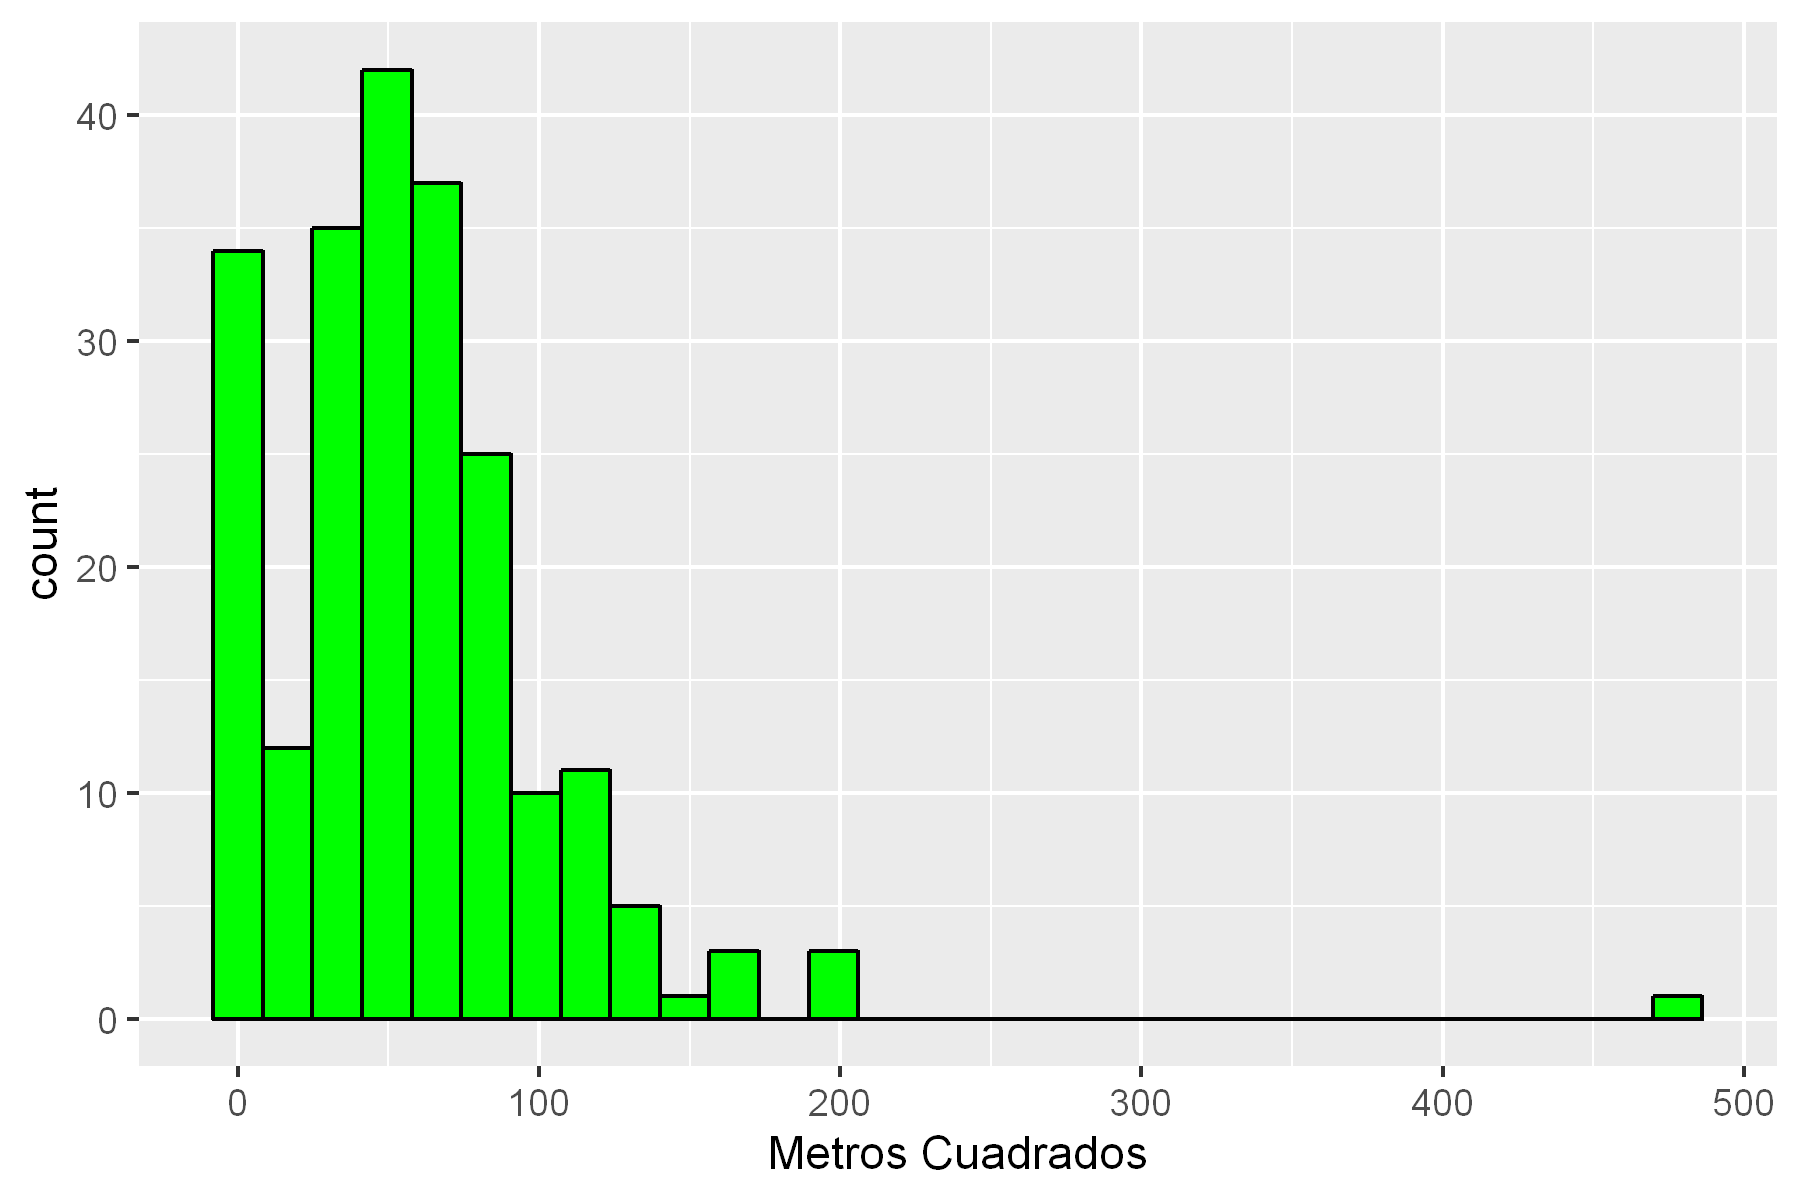

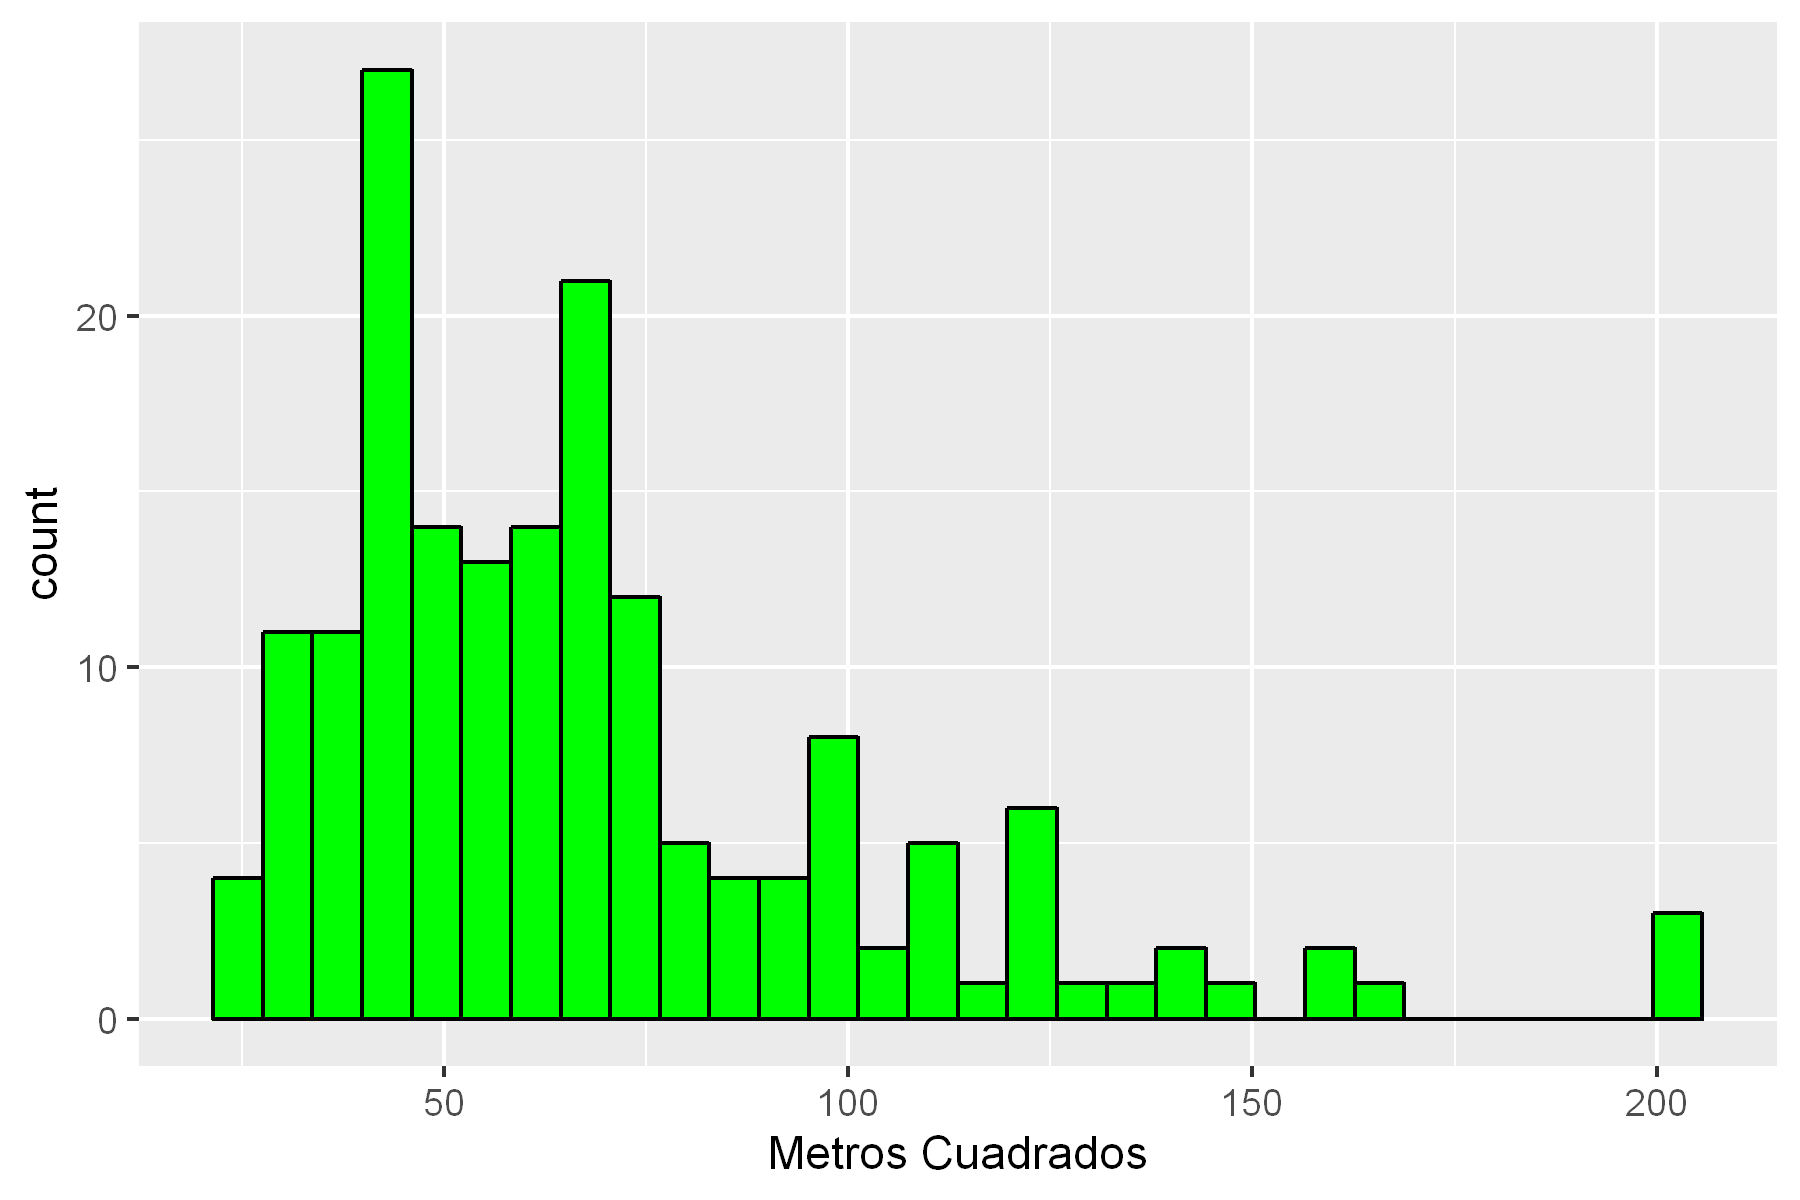

In [11]:
ggplot(data=df_madrid, aes(x=Square.Meters))+
geom_histogram(bins=30, fill="green", color="black")+
xlab("Metros Cuadrados")

df_madrid$Square.Meters[df_madrid$Square.Meters < 20] <- NA
df_madrid$Square.Meters[df_madrid$Square.Meters > 450] <- NA 
# He optado por eliminar aquellos que distaban mucho del resto de datos

library(ggplot2)
ggplot(data=df_madrid, aes(x=Square.Meters))+
geom_histogram(bins=30, fill="green", color="black")+
xlab("Metros Cuadrados")

Existen varios Barrios que todas sus entradas de Square.Meters son NA, vamos a eliminar del dataset todos los pisos que pertenecen a estos barrios.

In [12]:
b <- aggregate(Square.Meters ~ Neighbourhood, data=df_madrid, function(x) {sum(!is.na(x))}, na.action = na.pass)
b$Neighbourhood[b$Square.Meters == 0]

df_madrid$Neighbourhood[df_madrid$Neighbourhood == "Aluche" | df_madrid$Neighbourhood == "Arganzuela" | df_madrid$Neighbourhood == "Atocha" | df_madrid$Neighbourhood == "Bellas Vistas" | df_madrid$Neighbourhood == "Berruguete" | df_madrid$Neighbourhood == "Castillejos" || df_madrid$Neighbourhood == "Delicias" | df_madrid$Neighbourhood == "Estrella" | df_madrid$Neighbourhood == "Fuencarral-el Pardo" | df_madrid$Neighbourhood == "Fuencarral-El Pardo" | df_madrid$Neighbourhood == "Gaztambide" | df_madrid$Neighbourhood == "Guindalera" | df_madrid$Neighbourhood == "HispanoamÃ©rica" | df_madrid$Neighbourhood == "Hortaleza" | df_madrid$Neighbourhood == "Ibiza" | df_madrid$Neighbourhood == "Imperial" | df_madrid$Neighbourhood == "La Chopera" | df_madrid$Neighbourhood == "Legazpi" | df_madrid$Neighbourhood == "Moncloa" | df_madrid$Neighbourhood == "Nueva EspaÃ±a" | df_madrid$Neighbourhood == "Prosperidad" | df_madrid$Neighbourhood == "Puente de Vallecas" | df_madrid$Neighbourhood == "TetuÃ¡n" | df_madrid$Neighbourhood == "Valdeacederas" | df_madrid$Neighbourhood == "Vallehermosa" | df_madrid$Neighbourhood == "Villa de Vallecas" | df_madrid$Neighbourhood == "Villaverde" | df_madrid$Neighbourhood == NA] <- NA

df_madrid <- df_madrid %>% group_by(Neighbourhood) %>% filter(any(!is.na(Neighbourhood)))


summary(df_madrid)


[1] Aluche              Arganzuela          Atocha             
 [4] Bellas Vistas       Berruguete          Castillejos        
 [7] Delicias            Estrella            Fuencarral-el Pardo
[10] Fuencarral-El Pardo Gaztambide          Guindalera         
[13] HispanoamÃ©rica     Hortaleza           Ibiza              
[16] Imperial            La Chopera          Legazpi            
[19] Moncloa             Nueva EspaÃ±a       Prosperidad        
[22] Puente de Vallecas  TetuÃ¡n             Valdeacederas      
[25] Vallehermosa        Villa de Vallecas   Villaverde         
391 Levels:  Ã\230sterbro Acacias Acton Adams Morgan Adelfas ... Zilker

     Neighbourhood   Accommodates      Bathrooms        Bedrooms     
 MalasaÃ±a  : 679   Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Embajadores: 585   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 La Latina  : 571   Median : 4.000   Median :1.000   Median : 1.000  
 Sol        : 536   Mean   : 4.094   Mean   :1.242   Mean   : 1.429  
 Cortes     : 441   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
 Justicia   : 384   Max.   :16.000   Max.   :6.000   Max.   :10.000  
 (Other)    :1903                    NA's   :14      NA's   :7       
      Beds            Price         Square.Feet     Guests.Included 
 Min.   : 1.000   Min.   : 14.00   Min.   :   0.0   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 57.00   1st Qu.:   0.0   1st Qu.: 1.000  
 Median : 2.000   Median : 75.00   Median : 312.0   Median : 2.000  
 Mean   : 2.371   Mean   : 89.38   Mean   : 402.5   Mean   : 1.959  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 646.0   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :

El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

Warning message in resm[lower.tri(resm)] <- round(tky.result$p.adj, 4):
"número de items para para sustituir no es un múltiplo de la longitud del reemplazo"

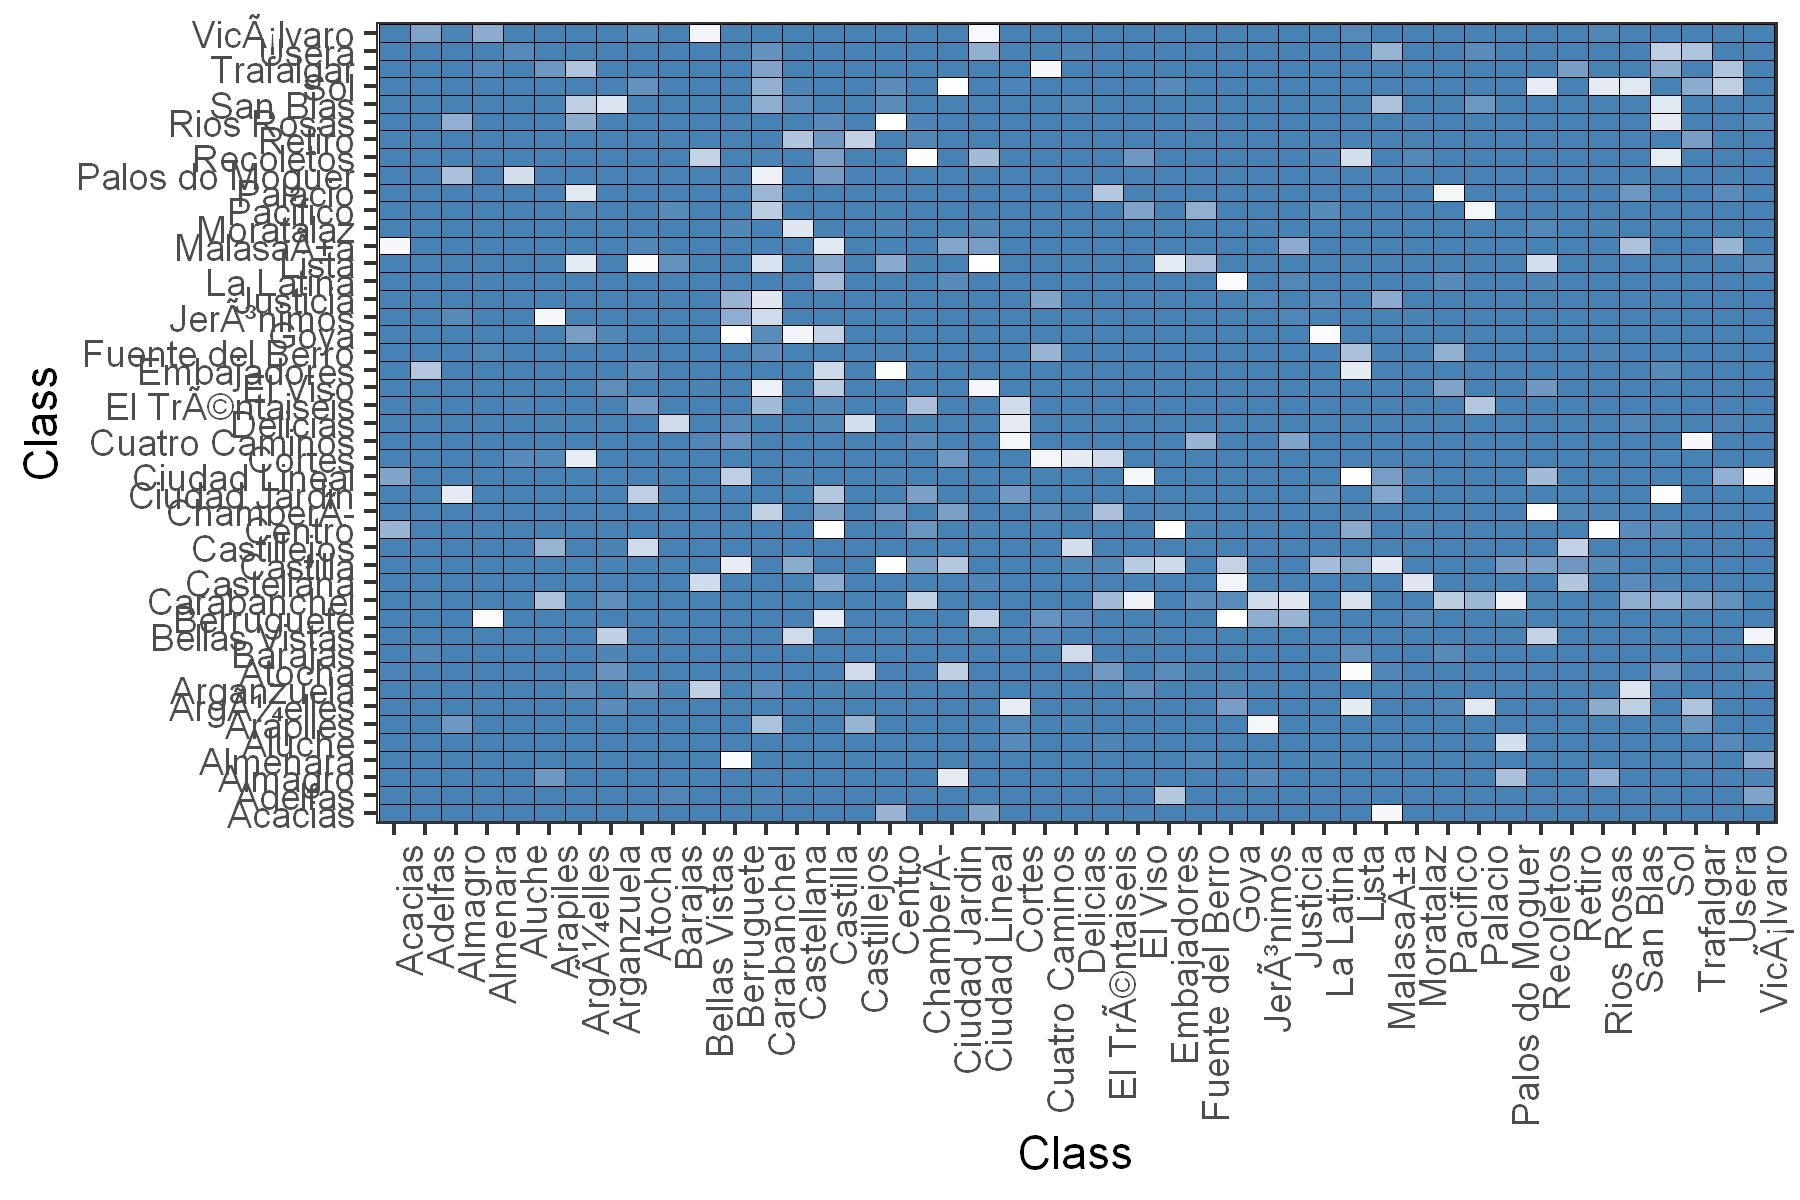

In [13]:
tky  <-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn   <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


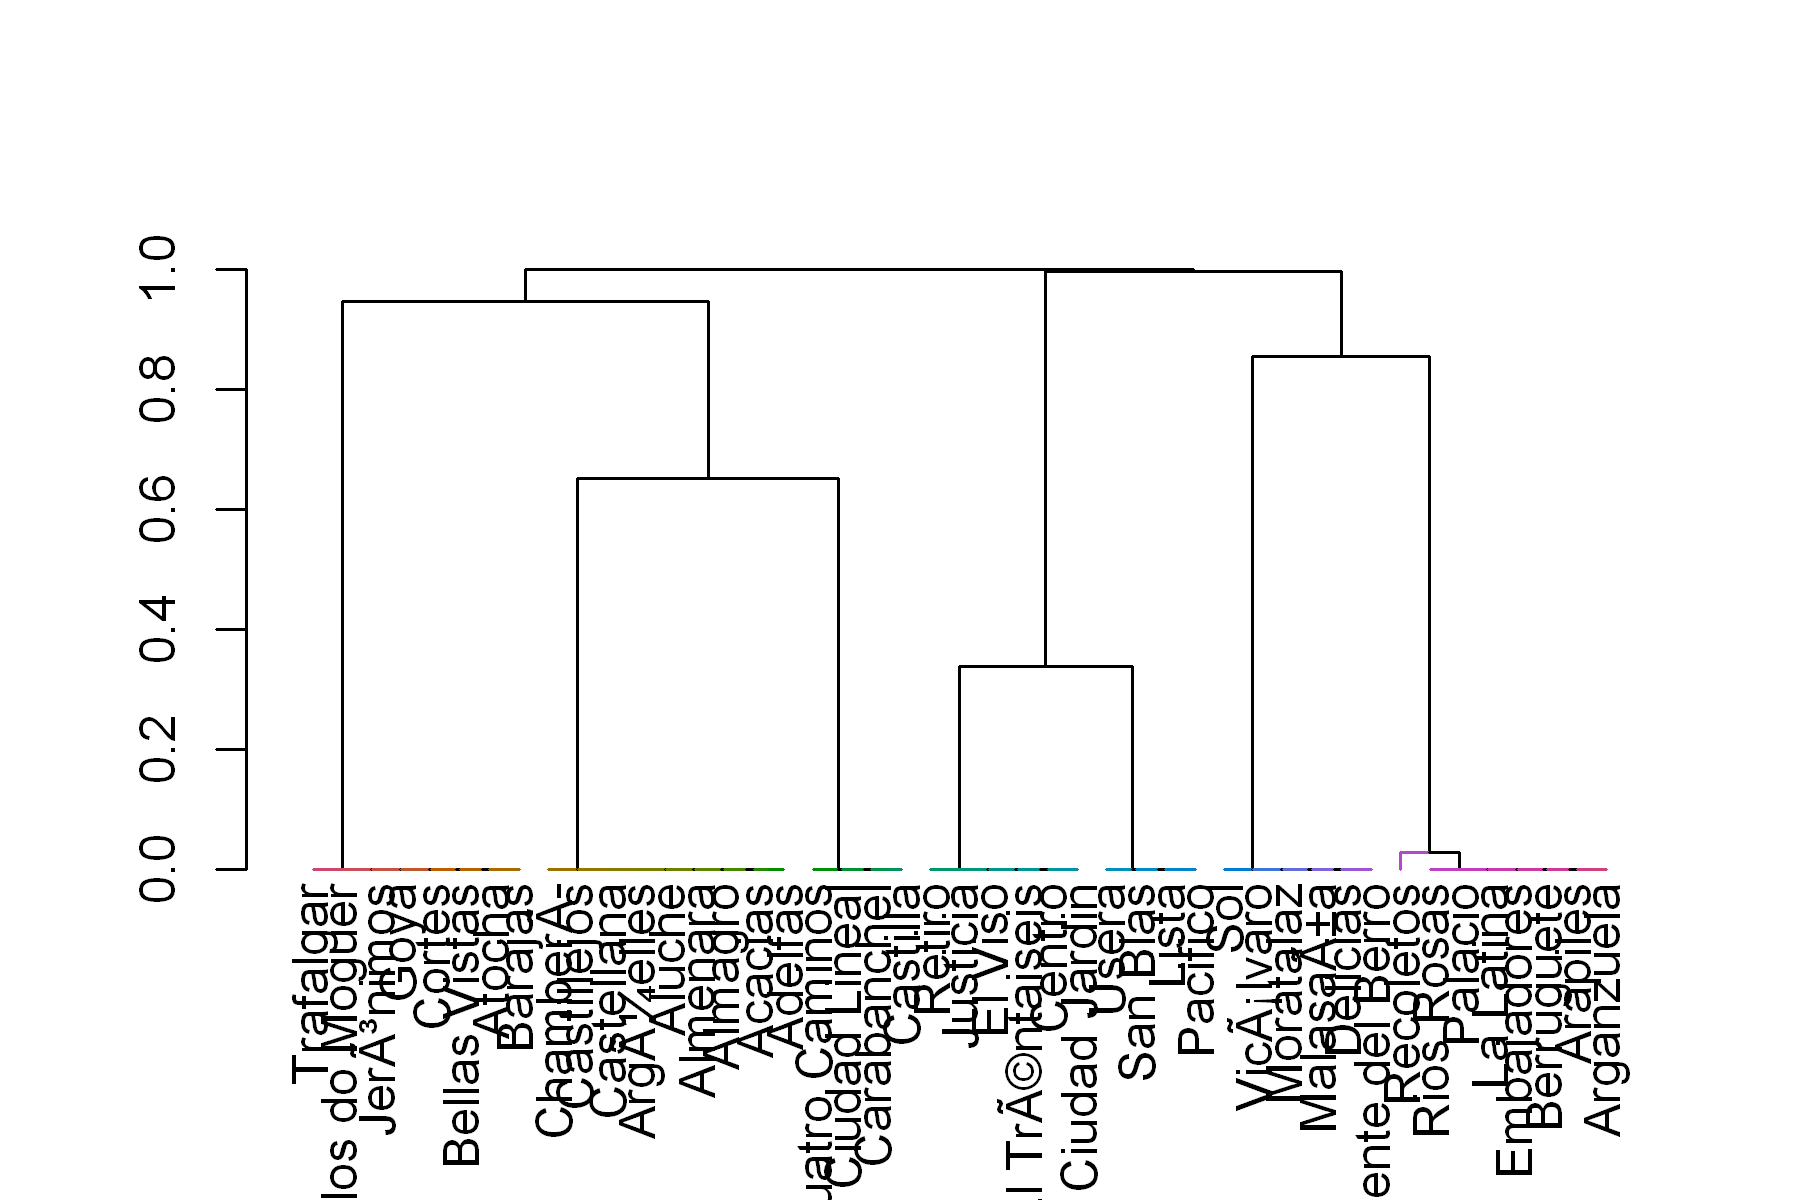

In [14]:
d   <- as.dist(1 - resm)
hc  <- hclust(d, method="complete")
hcd <- as.dendrogram(hc)
plot(color_branches(hcd))

¿Que punto de corte sería el aconsejable?, ¿cuantos clusters aparecen?

[1] "Podríamos quedarnos con un corte de 0.8 Aparecerían: 5 Clusters"

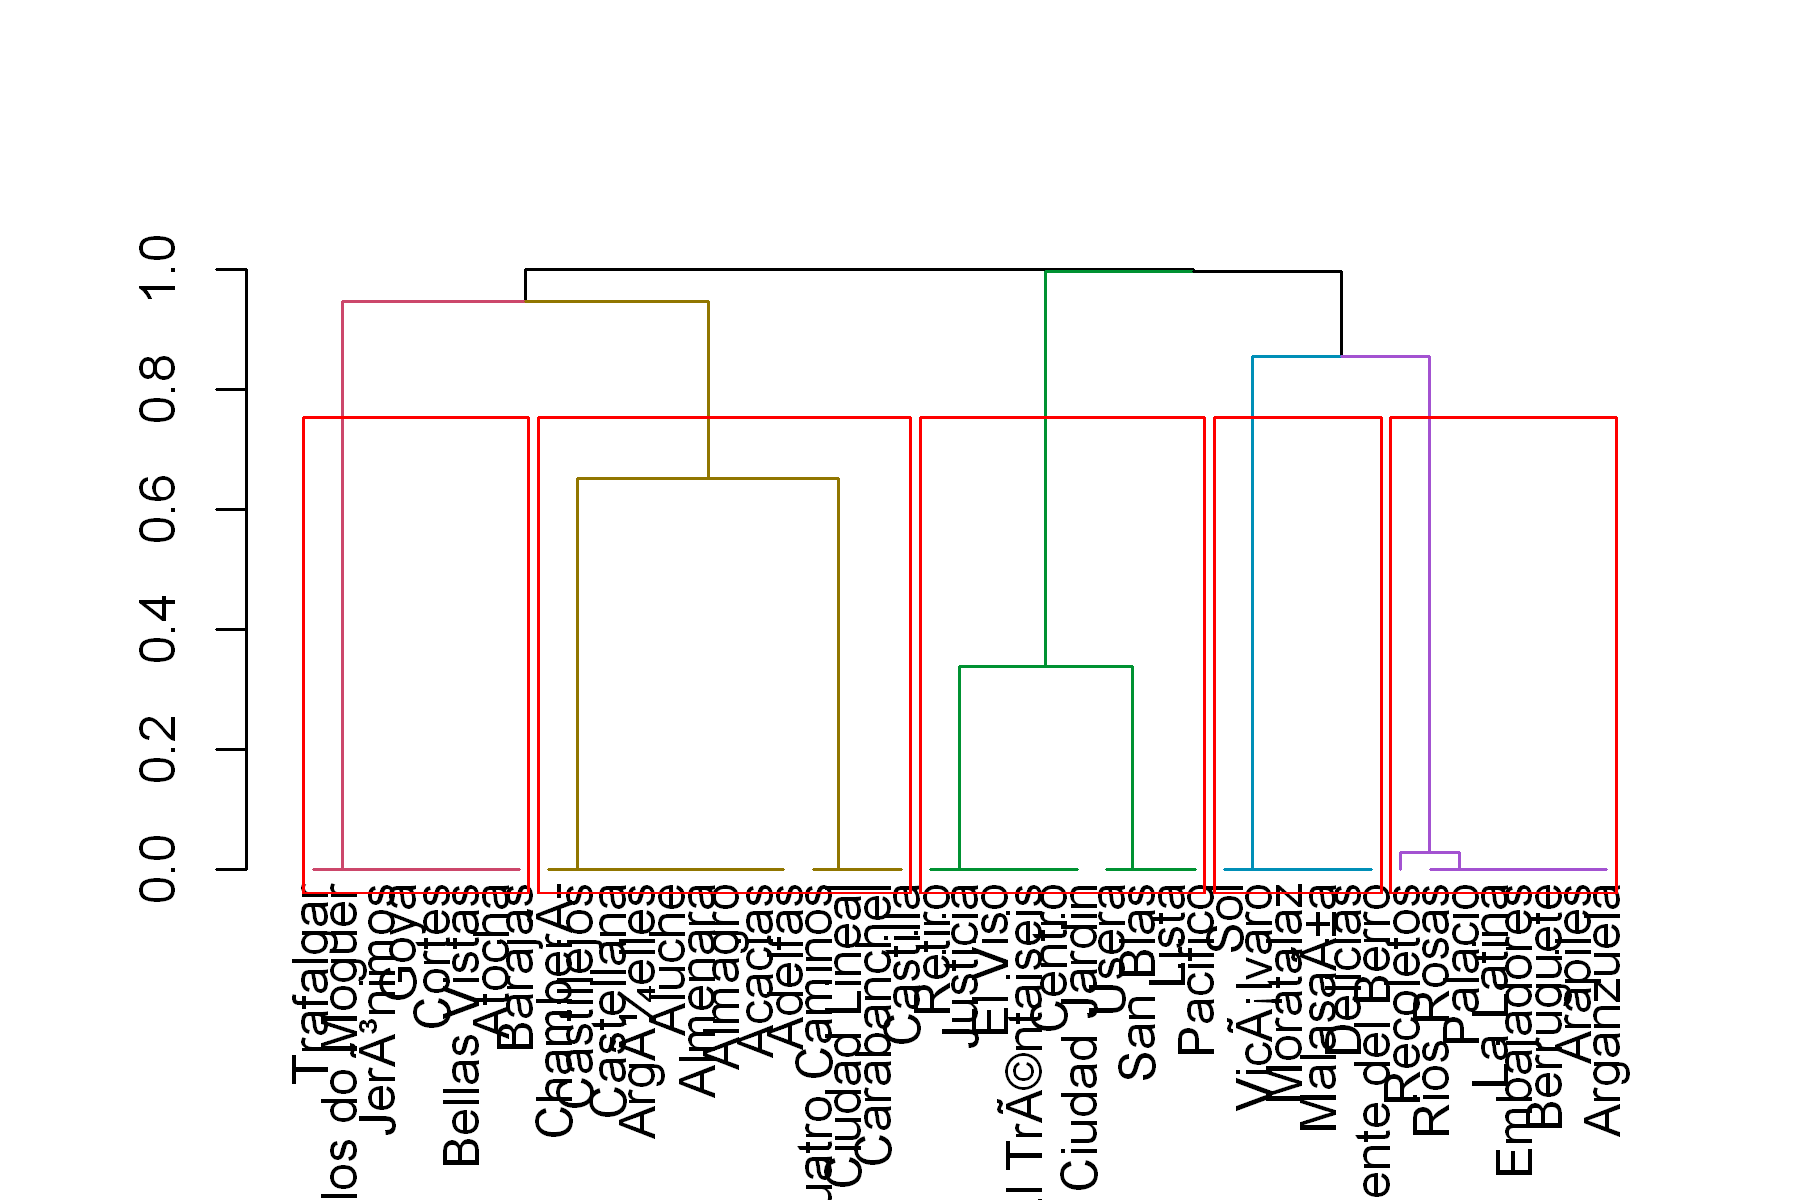

In [15]:
plot(color_branches(hcd,h=0.8))
hc_09 <- rect.hclust(hc, h=0.8)
paste("Podríamos quedarnos con un corte de 0.8", "Aparecerían:", length(hc_09), "Clusters")


Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [16]:
clusters <- cutree(hcd, h = 0.80)
df_madrid$neighb_id <- clusters[as.character(df_madrid$Neighbourhood)]
df_madrid$neighb_id <- as.factor(df_madrid$neighb_id)
summary(df_madrid)

     Neighbourhood   Accommodates      Bathrooms        Bedrooms     
 MalasaÃ±a  : 679   Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Embajadores: 585   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 La Latina  : 571   Median : 4.000   Median :1.000   Median : 1.000  
 Sol        : 536   Mean   : 4.094   Mean   :1.242   Mean   : 1.429  
 Cortes     : 441   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
 Justicia   : 384   Max.   :16.000   Max.   :6.000   Max.   :10.000  
 (Other)    :1903                    NA's   :14      NA's   :7       
      Beds            Price         Square.Feet     Guests.Included 
 Min.   : 1.000   Min.   : 14.00   Min.   :   0.0   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 57.00   1st Qu.:   0.0   1st Qu.: 1.000  
 Median : 2.000   Median : 75.00   Median : 312.0   Median : 2.000  
 Mean   : 2.371   Mean   : 89.38   Mean   : 402.5   Mean   : 1.959  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 646.0   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :

Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [17]:
idx <- sample(1:nrow(df_madrid),nrow(df_madrid)*0.7)
df_madrid.train <- df_madrid[idx,]
df_madrid.test  <- df_madrid[-idx,]

head(df_madrid.test)
head(df_madrid.train)

Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
Palacio,5,3,3,3,192,NA,2,12,80,40.42017,-3.712629,NA,2
Palacio,5,2,2,2,100,NA,2,15,95,40.42156,-3.709848,NA,2
Palacio,3,1,1,1,68,NA,2,5,83,40.41203,-3.715779,NA,2
Embajadores,3,1,1,1,50,NA,2,20,89,40.41205,-3.701022,NA,2
Embajadores,3,1,2,2,50,NA,1,10,93,40.40581,-3.700252,NA,2
Embajadores,4,1,1,2,35,NA,1,0,80,40.40980,-3.700681,NA,2


Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
Embajadores,4,1,0,2,69,NA,2,15,100,40.41082,-3.700126,NA,2
Embajadores,4,1,2,2,75,NA,2,15,99,40.40724,-3.699490,NA,2
Embajadores,2,1,1,1,55,NA,1,0,94,40.40887,-3.702458,NA,2
La Latina,2,1,1,1,87,NA,2,0,97,40.41200,-3.706098,NA,2
Embajadores,5,1,1,3,59,NA,4,10,86,40.40982,-3.703263,NA,2
ArgÃ¼elles,3,1,1,2,50,NA,1,0,NA,40.42678,-3.715474,NA,1


In [18]:
model  <- lm(Square.Meters~neighb_id+Price+Bedrooms+Bathrooms+Accommodates+Review.Scores.Rating+Beds, df_madrid.train)
summary(model)


Call:
lm(formula = Square.Meters ~ neighb_id + Price + Bedrooms + Bathrooms + 
    Accommodates + Review.Scores.Rating + Beds, data = df_madrid.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.770 -12.058  -1.208   9.099  76.408 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -32.01554   20.64940  -1.550 0.124135    
neighb_id2           -15.90385    5.73510  -2.773 0.006603 ** 
neighb_id3           -11.32546    7.19652  -1.574 0.118644    
neighb_id4           -10.46800    7.75310  -1.350 0.179950    
neighb_id5            -8.22622    5.68511  -1.447 0.150970    
Price                  0.11042    0.04221   2.616 0.010243 *  
Bedrooms              18.56788    3.28466   5.653 1.44e-07 ***
Bathrooms             16.05558    4.51124   3.559 0.000567 ***
Accommodates           3.37436    1.98922   1.696 0.092874 .  
Review.Scores.Rating   0.49881    0.21989   2.268 0.025406 *  
Beds                  -3.51639    2.32939  -1.

In [19]:
# Eliminando Accomodates y Beds obtenemos un mejor R^2 
model  <- lm(Square.Meters~neighb_id+Price+Bedrooms+Bathrooms+Review.Scores.Rating, df_madrid.train)
summary(model)

# Eliminando Review.Scores.Rating obtenemos todavía un mejor R^2
model2 <- lm(Square.Meters~neighb_id+Price+Bedrooms+Bathrooms, df_madrid.train)
summary(model2)


Call:
lm(formula = Square.Meters ~ neighb_id + Price + Bedrooms + Bathrooms + 
    Review.Scores.Rating, data = df_madrid.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-49.561 -11.626  -0.461   9.486  76.947 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -21.54433   19.07233  -1.130  0.26124    
neighb_id2           -14.99380    5.66767  -2.645  0.00942 ** 
neighb_id3           -12.41695    7.18707  -1.728  0.08701 .  
neighb_id4           -10.37679    7.72763  -1.343  0.18225    
neighb_id5            -8.17465    5.68227  -1.439  0.15326    
Price                  0.09750    0.04019   2.426  0.01699 *  
Bedrooms              18.63668    2.68574   6.939 3.48e-10 ***
Bathrooms             18.99186    4.21393   4.507 1.73e-05 ***
Review.Scores.Rating   0.41141    0.21307   1.931  0.05622 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 18.93 on 104 degrees of freedom
  (345


Call:
lm(formula = Square.Meters ~ neighb_id + Price + Bedrooms + Bathrooms, 
    data = df_madrid.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-59.344 -11.240  -1.476   8.197  79.868 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  13.10770    6.41509   2.043   0.0435 *  
neighb_id2  -11.91831    5.27030  -2.261   0.0257 *  
neighb_id3   -8.17524    6.81039  -1.200   0.2326    
neighb_id4   -7.34923    7.47994  -0.983   0.3280    
neighb_id5   -6.15979    5.44139  -1.132   0.2601    
Price         0.09421    0.03780   2.493   0.0142 *  
Bedrooms     18.96495    2.65097   7.154 1.06e-10 ***
Bathrooms    18.78087    4.19568   4.476 1.89e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 18.99 on 108 degrees of freedom
  (3453 observations deleted due to missingness)
Multiple R-squared:  0.7073,	Adjusted R-squared:  0.6883 
F-statistic: 37.28 on 7 and 108 DF,  p-value: < 2.2e-16


In [20]:
df_madrid.test$Predicted.SM <- predict(model2, df_madrid.test)
summary(df_madrid.test)

     Neighbourhood  Accommodates      Bathrooms        Bedrooms    
 MalasaÃ±a  :206   Min.   : 1.000   Min.   :0.000   Min.   :0.000  
 La Latina  :183   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.:1.000  
 Embajadores:180   Median : 4.000   Median :1.000   Median :1.000  
 Sol        :153   Mean   : 4.166   Mean   :1.255   Mean   :1.463  
 Cortes     :127   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.:2.000  
 Justicia   :121   Max.   :16.000   Max.   :6.000   Max.   :8.000  
 (Other)    :560                    NA's   :7       NA's   :1      
      Beds            Price         Square.Feet     Guests.Included 
 Min.   : 1.000   Min.   : 20.00   Min.   :   0.0   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 59.00   1st Qu.:   0.0   1st Qu.: 1.000  
 Median : 2.000   Median : 75.00   Median : 269.0   Median : 2.000  
 Mean   : 2.421   Mean   : 92.18   Mean   : 444.0   Mean   : 2.007  
 3rd Qu.: 3.000   3rd Qu.:105.00   3rd Qu.: 687.5   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :595.00   Max.   

Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

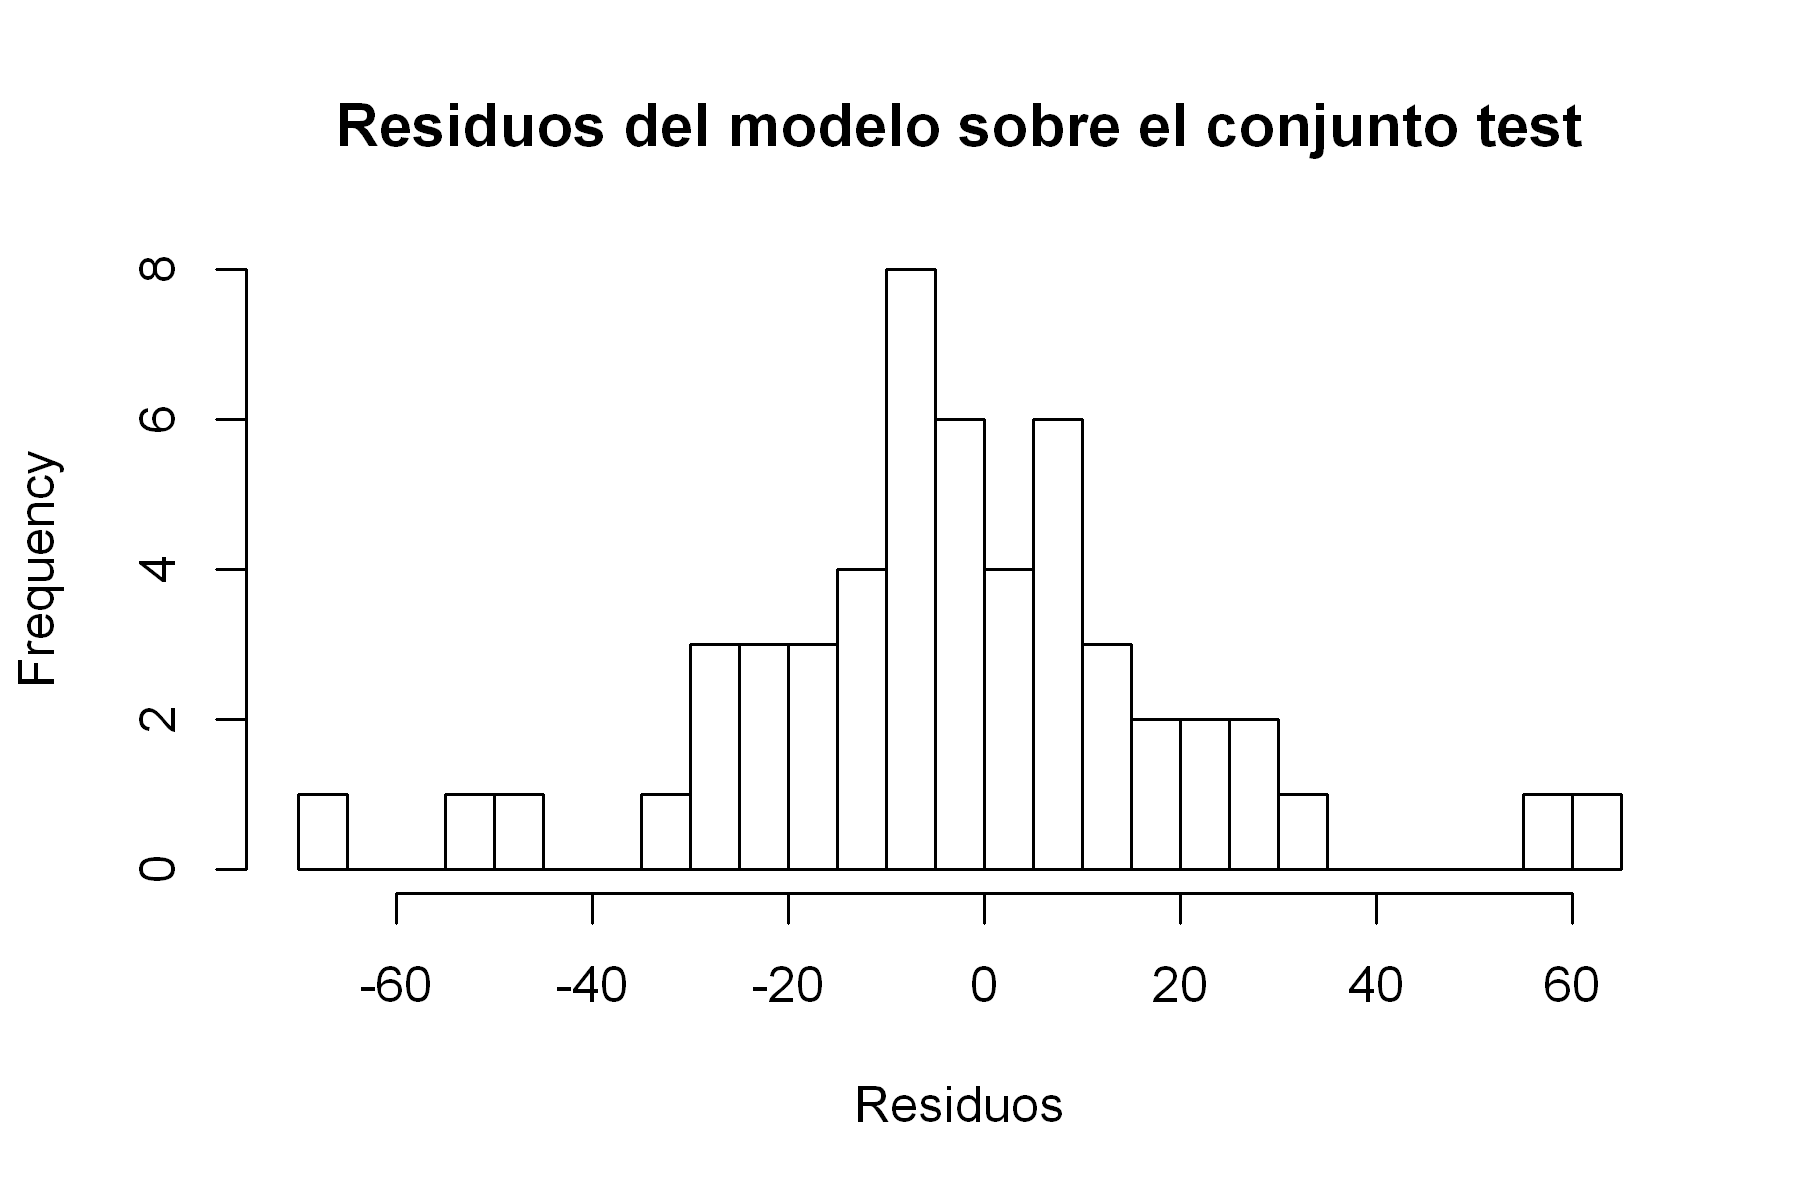

In [21]:
df_madrid.test$residual <- df_madrid.test$Square.Meters - df_madrid.test$Predicted.SM

hist(df_madrid.test$residual, xlab = "Residuos", main = "Residuos del modelo sobre el conjunto test", breaks=20)

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates), con 1 baño, con un precio de 80€/noche y 3 habitaciones en el barrio de Sol, con 3 camas y un review de 80.
¿Cuantos metros cuadrados tendría? Si tu modelo necesita algúna variable adicional puedes inventartela dentro del rango de valores del dataset.
¿Como varía sus metros cuadrados con cada habitación adicional?

In [22]:
summary(df_madrid$neighb_id[df_madrid$Neighbourhood == "Sol"])

m2_apartment <- round(predict(model2,data.frame(neighb_id = "5", Bedrooms = 3, Price = 80, Bathrooms = 1, Review.Scores.Rating = 80, Beds = 3)), 2)
paste("Mi modelo predice que el apartamento tendría:", m2_apartment, "m^2")

round(predict(model2,data.frame(neighb_id = "5", Bedrooms = 2, Price = 80, Bathrooms = 1, Review.Scores.Rating = 80, Beds = 3)), 2)
round(predict(model2,data.frame(neighb_id = "5", Bedrooms = 4, Price = 80, Bathrooms = 1, Review.Scores.Rating = 80, Beds = 3)), 2)
round(predict(model2,data.frame(neighb_id = "5", Bedrooms = 5, Price = 80, Bathrooms = 1, Review.Scores.Rating = 80, Beds = 3)), 2)

paste("A medida que cambiamos el número de habitaciones, los m^2 varían a razón 
        de 19-20 m^2 por habitación, lo que podría tener sentido por ser un tamaño
        plausible de una habitación extra")

1   2   3   4   5 
  0   0   0   0 536

[1] "Mi modelo predice que el apartamento tendría: 90.16 m^2"

1 
71.2

1 
109.13

1 
128.09

[1] "A medida que cambiamos el número de habitaciones, los m^2 varían a razón \n        de 19-20 m^2 por habitación, lo que podría tener sentido por ser un tamaño\n        plausible de una habitación extra"

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [23]:
df_madrid$Square.Meters <- predict(model2, df_madrid )
summary(df_madrid)

     Neighbourhood   Accommodates      Bathrooms        Bedrooms     
 MalasaÃ±a  : 679   Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Embajadores: 585   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 La Latina  : 571   Median : 4.000   Median :1.000   Median : 1.000  
 Sol        : 536   Mean   : 4.094   Mean   :1.242   Mean   : 1.429  
 Cortes     : 441   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
 Justicia   : 384   Max.   :16.000   Max.   :6.000   Max.   :10.000  
 (Other)    :1903                    NA's   :14      NA's   :7       
      Beds            Price         Square.Feet     Guests.Included 
 Min.   : 1.000   Min.   : 14.00   Min.   :   0.0   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 57.00   1st Qu.:   0.0   1st Qu.: 1.000  
 Median : 2.000   Median : 75.00   Median : 312.0   Median : 2.000  
 Mean   : 2.371   Mean   : 89.38   Mean   : 402.5   Mean   : 1.959  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 646.0   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :

Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [24]:
df_madrid_nona <- subset(df_madrid, select = c("Accommodates", "Bathrooms",
                                               "Bedrooms", "Beds", "Price",
                                               "Guests.Included", "Extra.People",
                                               "Review.Scores.Rating", "Latitude", 
                                               "Longitude", "Square.Meters"))
df_madrid_nona <- na.omit(df_madrid_nona) 
summary(df_madrid_nona)



  Accommodates      Bathrooms        Bedrooms          Beds       
 Min.   : 1.000   Min.   :0.000   Min.   :0.000   Min.   : 1.000  
 1st Qu.: 3.000   1st Qu.:1.000   1st Qu.:1.000   1st Qu.: 1.000  
 Median : 4.000   Median :1.000   Median :1.000   Median : 2.000  
 Mean   : 4.134   Mean   :1.238   Mean   :1.426   Mean   : 2.392  
 3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.:2.000   3rd Qu.: 3.000  
 Max.   :16.000   Max.   :6.000   Max.   :8.000   Max.   :16.000  
     Price        Guests.Included   Extra.People     Review.Scores.Rating
 Min.   : 14.00   Min.   : 1.000   Min.   :  0.000   Min.   : 20.00      
 1st Qu.: 55.00   1st Qu.: 1.000   1st Qu.:  0.000   1st Qu.: 88.00      
 Median : 72.00   Median : 2.000   Median : 10.000   Median : 93.00      
 Mean   : 86.37   Mean   : 2.022   Mean   :  9.314   Mean   : 91.37      
 3rd Qu.: 99.00   3rd Qu.: 2.000   3rd Qu.: 15.000   3rd Qu.: 97.00      
 Max.   :800.00   Max.   :15.000   Max.   :276.000   Max.   :100.00      
    Latitude 

In [33]:
Similar_five   <- function(df, apartment, num_apartments=5) {
    id <- as.integer(rownames(df_madrid_nona))
    df_madrid_id <- cbind(id=id, df_madrid_nona)
    pr_apartment <- prcomp(df, center = TRUE, scale. = TRUE)
    apart  <- predict(pr_apartment, newdata = apartment)
    dist   <- rowSums((apart[rep(1, times = nrow(pr_apartment$x)), ]-pr_apartment$x)^2)
    df_madrid_id[order(dist)[1:num_apartments],] 
}

apartment = df_madrid_nona[3999, c("Accommodates", "Bathrooms", "Bedrooms", "Beds", "Price",
                   "Guests.Included", "Extra.People", "Review.Scores.Rating", 
                   "Latitude", "Longitude", "Square.Meters")]

Similar_five(df_madrid_nona, apartment)


,id,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
3999,3999,4,1,1,1,58,2,15,99,40.41972,-3.700575,50.15793
3221,3221,4,1,1,1,75,2,15,99,40.42301,-3.700091,50.57006
3153,3153,4,1,1,1,60,2,12,98,40.42259,-3.697275,49.15691
1238,1238,4,1,1,1,59,2,15,98,40.41635,-3.705873,50.25214
1566,1566,4,1,1,1,55,2,15,95,40.41997,-3.700417,49.87530


Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?